In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
translation = pd.read_csv('product_category_name_translation.csv', sep=',')

# 1er aperçu de datasets pris séparement

### Dataset 'sellers'

In [3]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [4]:
sellers.shape

(3095, 4)

In [5]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [6]:
# Recherche des duplicatas
sellers.duplicated().sum()

0

In [7]:
sellers.duplicated('seller_id').sum()

0

In [8]:
# Nombre de seller_id différents
len(sellers['seller_id'].unique().tolist())

3095

In [9]:
sellers.duplicated('seller_zip_code_prefix').sum()

849

In [10]:
# Nombre de zip_code_prefix différents
len(sellers['seller_zip_code_prefix'].unique().tolist())

2246

In [11]:
sellers['seller_zip_code_prefix'].value_counts().to_dict()

{14940: 49,
 13660: 10,
 16200: 9,
 13920: 9,
 14020: 8,
 87050: 8,
 1026: 8,
 37540: 7,
 13481: 7,
 87015: 6,
 35530: 6,
 18015: 6,
 13560: 5,
 14401: 5,
 12940: 5,
 14075: 5,
 14092: 5,
 82510: 5,
 22790: 5,
 13480: 5,
 81070: 5,
 8710: 5,
 9560: 5,
 14090: 5,
 35501: 4,
 13360: 4,
 9810: 4,
 9230: 4,
 15155: 4,
 14096: 4,
 15025: 4,
 88704: 4,
 14403: 4,
 9111: 4,
 15015: 4,
 36500: 4,
 38400: 4,
 14802: 4,
 37564: 4,
 86010: 4,
 83323: 4,
 18500: 4,
 35570: 4,
 88301: 4,
 31255: 4,
 17400: 4,
 86800: 4,
 80010: 4,
 81350: 4,
 13330: 4,
 13070: 4,
 88330: 4,
 3029: 4,
 87083: 4,
 22793: 4,
 14085: 4,
 80240: 4,
 87025: 4,
 35500: 4,
 35700: 3,
 80710: 3,
 95800: 3,
 88359: 3,
 86706: 3,
 13930: 3,
 13840: 3,
 13043: 3,
 13880: 3,
 83408: 3,
 22775: 3,
 11701: 3,
 13405: 3,
 1123: 3,
 9015: 3,
 14801: 3,
 18040: 3,
 80620: 3,
 8577: 3,
 80220: 3,
 6018: 3,
 9070: 3,
 2310: 3,
 6717: 3,
 86047: 3,
 18550: 3,
 4133: 3,
 8275: 3,
 8223: 3,
 12327: 3,
 14406: 3,
 84010: 3,
 37410: 3,
 85

In [12]:
sellers.duplicated('seller_city').sum()

2484

In [13]:
# Nombre de seller_city différents
len(sellers['seller_city'].unique().tolist())

611

In [14]:
sellers['seller_city'].value_counts().to_dict()

{'sao paulo': 694,
 'curitiba': 127,
 'rio de janeiro': 96,
 'belo horizonte': 68,
 'ribeirao preto': 52,
 'guarulhos': 50,
 'ibitinga': 49,
 'santo andre': 45,
 'campinas': 41,
 'maringa': 40,
 'sao jose do rio preto': 33,
 'osasco': 32,
 'sorocaba': 32,
 'sao bernardo do campo': 32,
 'porto alegre': 28,
 'brasilia': 28,
 'londrina': 26,
 'goiania': 23,
 'joinville': 22,
 'blumenau': 21,
 'sao caetano do sul': 20,
 'franca': 20,
 'caxias do sul': 18,
 'sao jose dos campos': 18,
 'florianopolis': 18,
 'limeira': 17,
 'santos': 16,
 'mogi das cruzes': 15,
 'marilia': 15,
 'jundiai': 14,
 'cascavel': 14,
 'bauru': 14,
 'maua': 13,
 'barueri': 13,
 'sao carlos': 13,
 'rio claro': 12,
 'uberlandia': 12,
 'piracicaba': 12,
 'presidente prudente': 12,
 'contagem': 12,
 'atibaia': 11,
 'araraquara': 11,
 'juiz de fora': 10,
 'americana': 10,
 'birigui': 10,
 'arapongas': 10,
 'carapicuiba': 10,
 'taboao da serra': 10,
 'praia grande': 10,
 'brusque': 10,
 'catanduva': 10,
 'itajai': 10,
 'sao

In [15]:
sellers.duplicated('seller_state').sum()

3072

In [16]:
# Nombre de seller_state différents
len(sellers['seller_state'].unique().tolist())

23

In [17]:
# Fonction à appeler lorsqu'on veut afficher les valeurs exactes
# sur les barres des barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

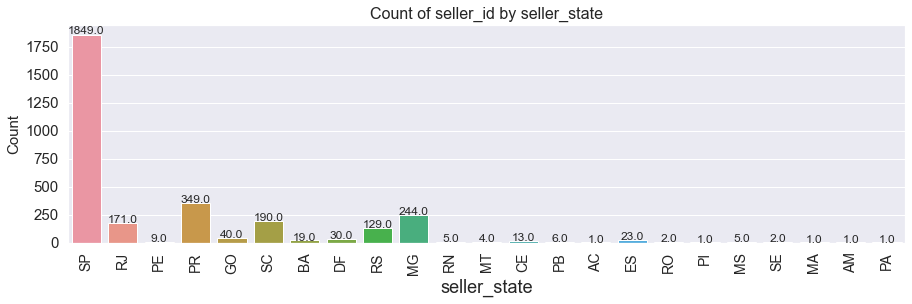

In [18]:
# Répartition du nombre de seller_id par seller_state
# sous forme de barplot

plt.figure(figsize=(15,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="seller_state", 
                  data=sellers)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("seller_state", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of seller_id by seller_state", 
          fontsize=16)

show_values(g);

### Dataset 'products'

In [19]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
products.shape

(32951, 9)

In [21]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
# Recherche des duplicatas
products.duplicated().sum()

0

In [24]:
products.duplicated('product_id').sum()

0

In [25]:
# Nombre de product_category_name différents
len(products['product_category_name'].unique().tolist())

74

In [26]:
products['product_category_name'].value_counts().to_dict()

{'cama_mesa_banho': 3029,
 'esporte_lazer': 2867,
 'moveis_decoracao': 2657,
 'beleza_saude': 2444,
 'utilidades_domesticas': 2335,
 'automotivo': 1900,
 'informatica_acessorios': 1639,
 'brinquedos': 1411,
 'relogios_presentes': 1329,
 'telefonia': 1134,
 'bebes': 919,
 'perfumaria': 868,
 'fashion_bolsas_e_acessorios': 849,
 'papelaria': 849,
 'cool_stuff': 789,
 'ferramentas_jardim': 753,
 'pet_shop': 719,
 'eletronicos': 517,
 'construcao_ferramentas_construcao': 400,
 'eletrodomesticos': 370,
 'malas_acessorios': 349,
 'consoles_games': 317,
 'moveis_escritorio': 309,
 'instrumentos_musicais': 289,
 'eletroportateis': 231,
 'casa_construcao': 225,
 'livros_interesse_geral': 216,
 'fashion_calcados': 173,
 'moveis_sala': 156,
 'climatizacao': 124,
 'livros_tecnicos': 123,
 'telefonia_fixa': 116,
 'casa_conforto': 111,
 'alimentos_bebidas': 104,
 'market_place': 104,
 'fashion_roupa_masculina': 95,
 'moveis_cozinha_area_de_servico_jantar_e_jardim': 94,
 'sinalizacao_e_seguranca': 93

### Dataset 'orders'

In [27]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [28]:
orders.shape

(99441, 8)

In [29]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
orders.duplicated().sum()

0

In [31]:
orders.duplicated('order_id').sum()

0

In [32]:
orders.duplicated('customer_id').sum()

0

In [33]:
orders['order_status'].value_counts().to_dict()

{'delivered': 96478,
 'shipped': 1107,
 'canceled': 625,
 'unavailable': 609,
 'invoiced': 314,
 'processing': 301,
 'created': 5,
 'approved': 2}

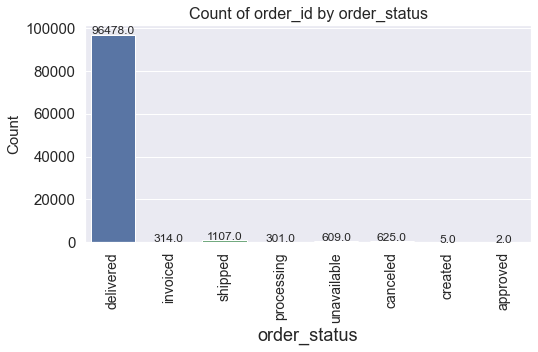

In [34]:
# Répartition du nombre de order_id par order_status
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="order_status", 
                  data=orders)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("order_status", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of order_id by order_status", 
          fontsize=16)

show_values(g);

### Dataset 'order_reviews'

In [35]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [36]:
order_reviews.shape

(99224, 7)

In [37]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [38]:
order_reviews.duplicated().sum()

0

In [39]:
order_reviews.duplicated('review_id').sum()

814

In [40]:
order_reviews.duplicated('order_id').sum()

551

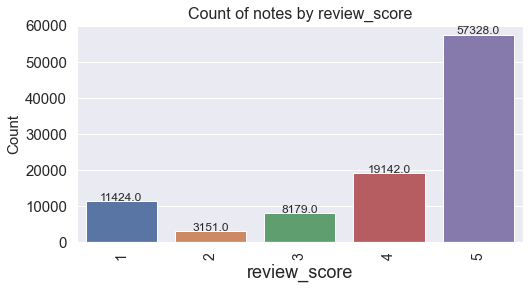

In [41]:
# Répartition du nombre notes par review_score
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="review_score", 
                  data=order_reviews)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of notes by review_score", 
          fontsize=16)

show_values(g);

In [42]:
order_reviews = order_reviews.fillna(value = {'review_comment_title' : 'None',
                                              'review_comment_message' : 'None'})

In [43]:
order_reviews['review_comment_title'].value_counts().to_dict()

{'None': 87656,
 'Recomendo': 423,
 'recomendo': 345,
 'Bom': 293,
 'super recomendo': 270,
 'Excelente': 248,
 'Muito bom': 247,
 'Ótimo': 240,
 'Super recomendo': 217,
 'Ótimo ': 207,
 'Otimo': 174,
 '10': 158,
 'Excelente ': 119,
 'otimo': 105,
 'bom': 97,
 'Muito bom ': 87,
 'Boa': 86,
 'Recomendo ': 62,
 'Perfeito': 57,
 'Ótima': 55,
 'RECOMENDO': 55,
 'Bom ': 55,
 'super recomendado': 55,
 'Não recomendo': 54,
 'muito bom': 54,
 'SUPER RECOMENDO': 51,
 'Ruim': 47,
 'excelente': 44,
 'não recomendo': 44,
 'Ótimo produto': 44,
 'Ótima ': 41,
 'Super Recomendo': 39,
 'Nota 10': 39,
 'Produto errado': 38,
 'Entrega rápida': 38,
 'Ok': 37,
 'Não recebi o produto': 35,
 'recomendado': 35,
 'Produto com defeito': 34,
 'Recomendo.': 34,
 'Otima': 34,
 '5': 33,
 'Muito bom!': 33,
 'Produto não entregue': 32,
 '*****': 32,
 'Bom produto': 30,
 'Top': 30,
 'Excelente!': 29,
 'ótimo': 29,
 '8': 28,
 'Ótimo produto ': 27,
 'Muito boa': 27,
 'Satisfeito': 27,
 'Recomendo!': 26,
 'boa': 26,
 'G

In [44]:
order_reviews['review_comment_message'].value_counts().to_dict()

{'None': 58247,
 'Muito bom': 230,
 'Bom': 189,
 'muito bom': 122,
 'bom': 107,
 'Recomendo': 100,
 'Otimo': 99,
 'otimo': 96,
 'Ótimo': 77,
 'Ótimo ': 74,
 'Ok': 72,
 'Excelente': 71,
 'Muito bom ': 66,
 'recomendo': 65,
 'ok': 55,
 '.': 51,
 'Recomendo ': 50,
 'Boa': 47,
 'Tudo ok': 45,
 'Ótimo produto': 44,
 'Não recebi o produto': 37,
 'Gostei': 37,
 'Muito bom.': 34,
 'Excelente ': 34,
 'excelente': 32,
 'boa': 31,
 'ótimo': 27,
 'Recomendo.': 27,
 'tudo ok': 25,
 'Adorei': 25,
 'Muito bom!': 24,
 'otima': 24,
 'Tudo certo': 23,
 'Nota 10': 23,
 'Gostei muito': 22,
 'Ótimo produto ': 21,
 'Chegou antes do prazo': 20,
 'Bom produto': 20,
 'Perfeito': 19,
 'Ótimo produto.': 19,
 '10': 19,
 'Super recomendo': 18,
 'Bom ': 18,
 'Ótima ': 18,
 'Top': 17,
 'otimo produto': 17,
 'Tudo certo ': 16,
 'Produto muito bom': 16,
 'Satisfeito': 16,
 'Muito bom o produto': 16,
 'bom produto': 15,
 'Não recebi o produto ': 14,
 'Amei': 14,
 'Entrega rápida ': 14,
 'Produto entregue antes do prazo

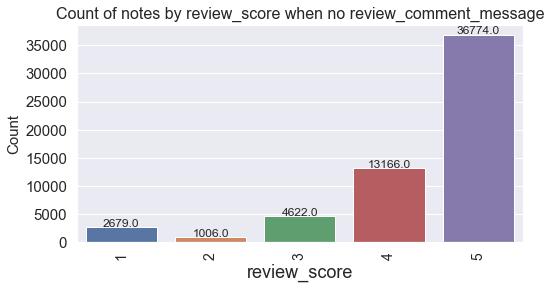

In [45]:
# Répartition du nombre notes par review_score quand il n'y a pas de 'review_comment_message'
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="review_score", 
                  data=order_reviews.loc[order_reviews['review_comment_message'] == 'None'])

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of notes by review_score when no review_comment_message", 
          fontsize=16)

show_values(g);

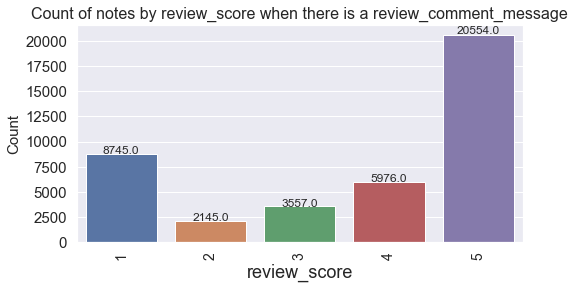

In [46]:
# Répartition du nombre notes par review_score quand il y a un 'review_comment_message'
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="review_score", 
                  data=order_reviews.loc[order_reviews['review_comment_message'] != 'None'])

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of notes by review_score when there is a review_comment_message", 
          fontsize=16)

show_values(g);

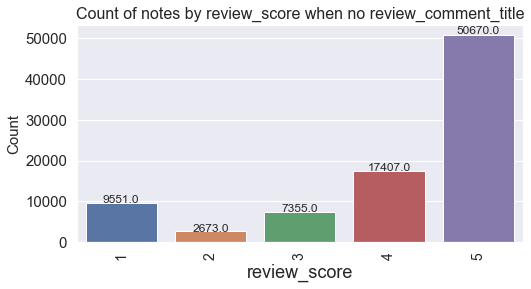

In [47]:
# Répartition du nombre notes par review_score quand il n'y a pas de 'review_comment_title'
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="review_score", 
                  data=order_reviews.loc[order_reviews['review_comment_title'] == 'None'])

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of notes by review_score when no review_comment_title", 
          fontsize=16)

show_values(g);

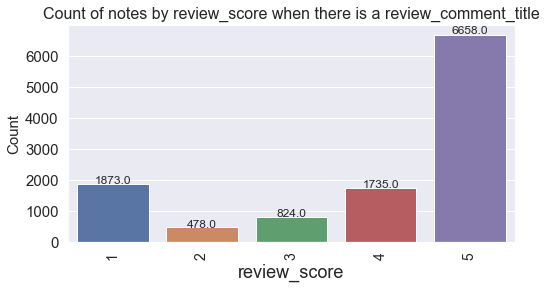

In [48]:
# Répartition du nombre notes par review_score quand il y a un 'review_comment_title'
# sous forme de barplot

plt.figure(figsize=(8,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="review_score", 
                  data=order_reviews.loc[order_reviews['review_comment_title'] != 'None'])

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("review_score", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of notes by review_score when there is a review_comment_title", 
          fontsize=16)

show_values(g);

### Dataset 'order_payments'

In [49]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [50]:
order_payments.loc[order_payments['order_id'] == '42fdf880ba16b47b59251dd489d4441a']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [51]:
order_payments.loc[order_payments['payment_installments'] != 1]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
...,...,...,...,...,...
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80


In [52]:
order_payments.shape

(103886, 5)

In [53]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [54]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [55]:
order_payments.duplicated().sum()

0

In [56]:
order_payments.duplicated('order_id').sum()

4446

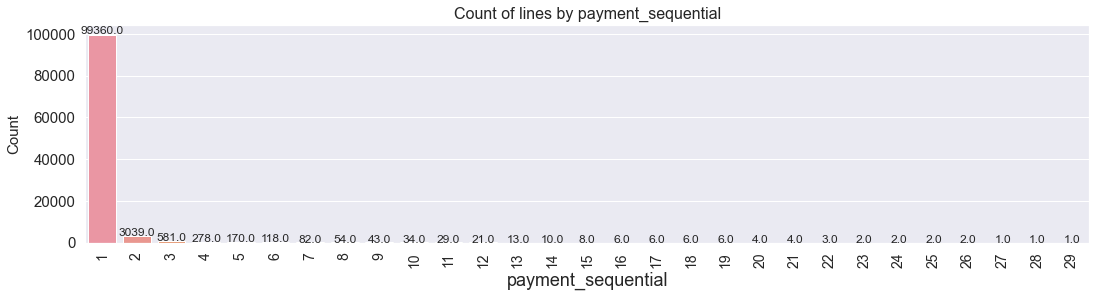

In [57]:
# Répartition du nombre de lignes par payment_sequential
# sous forme de barplot

plt.figure(figsize=(18,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="payment_sequential", 
                  data=order_payments)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("payment_sequential", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of lines by payment_sequential", 
          fontsize=16)

show_values(g);

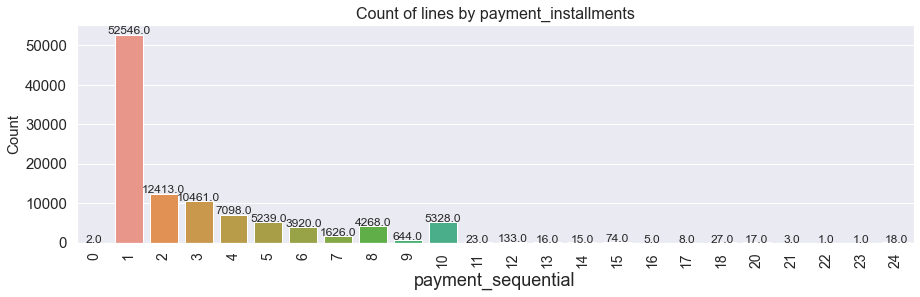

In [58]:
# Répartition du nombre de lignes par payment_installments
# sous forme de barplot

plt.figure(figsize=(15,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="payment_installments", 
                  data=order_payments)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("payment_sequential", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of lines by payment_installments", 
          fontsize=16)

show_values(g);

In [59]:
order_payments['payment_type'].value_counts().to_dict()

{'credit_card': 76795,
 'boleto': 19784,
 'voucher': 5775,
 'debit_card': 1529,
 'not_defined': 3}

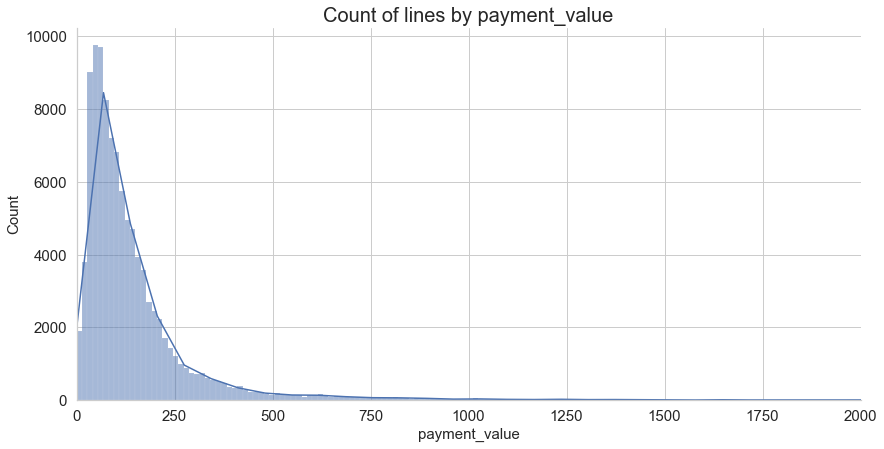

In [60]:
# Répartition du nombre de lignes en fonction de payment_value

sns.set_theme(style="whitegrid")

sns.displot(order_payments, 
            x="payment_value", 
            bins = 1000, 
            kde = True, 
            height = 6, 
            aspect = 2)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlabel("payment_value", 
           size=15)
plt.ylabel("Count", 
           size=15)

plt.xlim(0, 2000)

plt.title("Count of lines by payment_value", 
          fontsize=20);

### Dataset 'order_items'

In [13]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_items.shape

(112650, 7)

In [61]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [62]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [63]:
order_items.duplicated().sum()

0

In [64]:
order_items.duplicated('order_id').sum()

13984

In [66]:
order_items.duplicated('product_id').sum()

79699

In [67]:
order_items.duplicated('seller_id').sum()

109555

In [69]:
len(order_items['seller_id'].unique().tolist())

3095

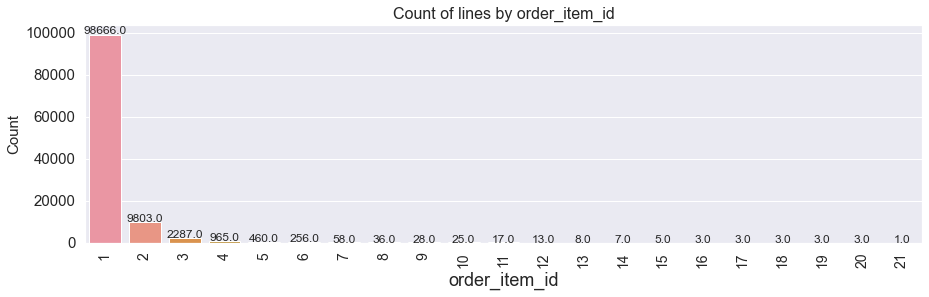

In [65]:
# Répartition du nombre de lignes par order_item_id
# sous forme de barplot

plt.figure(figsize=(15,4))

sns.set_theme(style="darkgrid")

g = sns.countplot(x="order_item_id", 
                  data=order_items)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14, rotation=90)

plt.xlabel("order_item_id", 
           size=18)
plt.ylabel("Count", 
           size=15)

plt.title("Count of lines by order_item_id", 
          fontsize=16)

show_values(g);

### Dataset 'geolocation'

In [15]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [16]:
geolocation.shape

(1000163, 5)

### Dataset 'customers'

In [17]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
customers.shape

(99441, 5)

### Dataset 'translation'

In [19]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
translation.shape

(71, 2)